# Item to item based recommendation system based on product description


For my business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in the product description.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use("ggplot")
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans

In [2]:
product_descriptions = pd.read_csv('product_descriptions.csv')
product_descriptions.shape

(124428, 2)

In [3]:
# Missing values

product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [4]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

0    Not only do angles make joints stronger, they ...
1    BEHR Premium Textured DECKOVER is an innovativ...
2    Classic architecture meets contemporary design...
3    The Grape Solar 265-Watt Polycrystalline PV So...
4    Update your bathroom with the Delta Vero Singl...
5    Achieving delicious results is almost effortle...
6    The Quantum Adjustable 2-Light LED Black Emerg...
7    The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8    Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9    Valley View Industries Metal Stakes (4-Pack) a...
Name: product_description, dtype: object

In [5]:
#Feature extraction from product descriptions

vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1["product_description"])
X1

<500x8932 sparse matrix of type '<class 'numpy.float64'>'
	with 34817 stored elements in Compressed Sparse Row format>

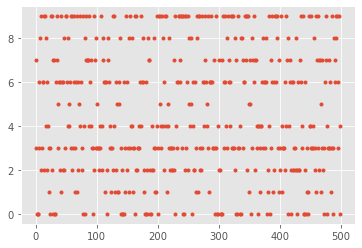

In [6]:
# Fitting K-Means to the dataset

X=X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [7]:
# Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 wall
 sheet
 panels
 plate
 tile
 home
 speaker
 beaded
 indoor
 commercial
Cluster 1:
 tool
 cutting
 handle
 power
 easy
 water
 saw
 free
 design
 use
Cluster 2:
 bamboo
 wood
 natural
 insulation
 shades
 wicker
 collection
 filter
 cushions
 woven
Cluster 3:
 light
 watt
 metal
 bulb
 led
 volt
 home
 fixture
 fan
 bulbs
Cluster 4:
 aluminum
 frame
 ladder
 window
 cut
 screen
 easy
 ft
 door
 roller
Cluster 5:
 snow
 tape
 start
 easy
 engine
 heater
 mower
 electric
 gas
 blower
Cluster 6:
 concrete
 water
 brush
 garage
 ft
 used
 paint
 use
 epoxy
 surface
Cluster 7:
 air
 cooking
 cooling
 oven
 cycle
 water
 control
 wash
 gas
 cu
Cluster 8:
 post
 outdoor
 vary
 rug
 help
 ft
 100
 fence
 easy
 product
Cluster 9:
 door
 storage
 shelves
 finish
 adjustable
 shelf
 design
 nickel
 room
 look


In [8]:
#Predicting clusters based on key search words

print("Cluster ID:")
Y = vectorizer.transform(["cutting tool"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [9]:
print("Cluster ID:")
Y = vectorizer.transform(["spray paint"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[6]


In [10]:
print("Cluster ID:")
Y = vectorizer.transform(["steel drill"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[1]


In [11]:
print("Cluster ID:")
Y = vectorizer.transform(["water"])
prediction = model.predict(Y)
print(prediction)

Cluster ID:
[6]


Once a cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.